## Importando as bibliotecas

In [1]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max.rows', None,'display.max.columns', None)

## Importando os dados

In [2]:
dataset = pd.read_csv('Dados\DadosTelco.csv', sep=';')
dataset.head()

,clienteId,cancelouPlano,genero,cidadaoIdoso,temParceiro,temDependentes,mesesContrato,assinaturaTelefonica,multiplasLinhas,provedorInternet,segurancaOnline,backupOnline,protecaoDispositivo,suporteTecnico,streamingTV,streamingFilmes,tipoContrato,contaOnline,gastoDiario,formaPagamento,totalServicosMensalmente,totalGasto,validacaoTotalGasto,diferencaTotalGasto
0,0002-ORFBO,Não,Feminino,Não,Sim,Sim,9,Sim,Não,DSL,Não,Sim,Não,Sim,Sim,Não,Um ano,Sim,2.0,Conta Enviada,65.6,593.30,590.4,2.90
1,0003-MKNFE,Não,Masculino,Não,Não,Não,9,Sim,Sim,DSL,Não,Não,Não,Não,Não,Sim,Mensal,Não,2.0,Conta Enviada,59.9,542.40,539.1,3.30
2,0004-TLHLJ,Sim,Masculino,Não,Não,Não,4,Sim,Não,Fibra ótica,Não,Não,Sim,Não,Não,Não,Mensal,Sim,2.0,Conta Eletrônica,73.9,280.85,295.6,-14.75
3,0011-IGKFF,Sim,Masculino,Sim,Sim,Não,13,Sim,Não,Fibra ótica,Não,Sim,Sim,Não,Sim,Sim,Mensal,Sim,3.0,Conta Eletrônica,98.0,1237.85,1274.0,-36.15
4,0013-EXCHZ,Sim,Feminino,Sim,Sim,Não,3,Sim,Não,Fibra ótica,Não,Não,Não,Sim,Sim,Não,Mensal,Sim,3.0,Conta Enviada,83.9,267.40,251.7,15.70


## Análise Exploratória

###  Variável Churn

Verificando a variável de Churn(cancelouPlano)

<AxesSubplot:xlabel='cancelouPlano', ylabel='count'>

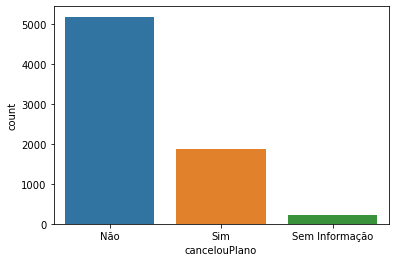

In [3]:
sns.countplot(x='cancelouPlano', data=dataset)

Verificando a relação da variável de Churn com as outras variáveis

 ### Correlação com as outras variáveis

##### Correlação com Gênero (não existe correlação) 

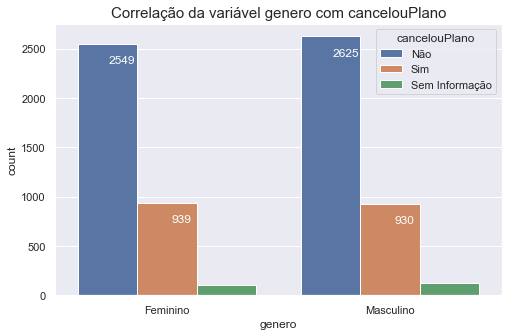

In [48]:
sns.set_theme(style="darkgrid")
fig, axs = plt.subplots(figsize=[8,5])

ax = sns.countplot(x='genero', hue='cancelouPlano', data=dataset)
ax.set_title('Correlação da variável genero com cancelouPlano', fontsize=15)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=12)
plt.show()

##### Correlação com cidadaoIdoso 

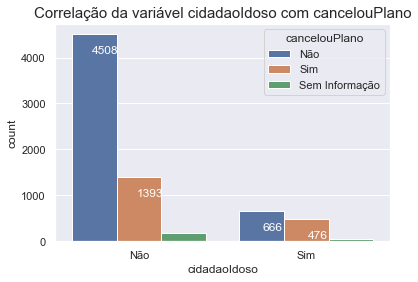

In [49]:
ax =  sns.countplot(x='cidadaoIdoso', hue='cancelouPlano', data=dataset)
ax.set_title('Correlação da variável cidadaoIdoso com cancelouPlano', fontsize=15)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=12)
plt.show()

A taxa de cancelamento para os poucos clientes idosos que temos é quase de 50%, teriamos que validar se podemos montar melhores pacotes para esse público (dependendo se ele é alvo ou não)

##### Correlação com provedorInternet (A proporção de clientes com fibra ótica que cancelaram é bem grande) 

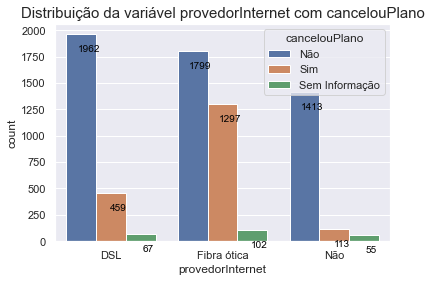

In [38]:
ax = sns.countplot(x= 'provedorInternet', hue='cancelouPlano', data=dataset)
ax.set_title('Distribuição da variável provedorInternet com cancelouPlano', fontsize=15)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=10
               )
plt.show()

Acredito que devemos verificar se temos algum problema de perda de pacote etc pois o churn está muito alto para esse provedor.

##### Correlação com suporteTecnico

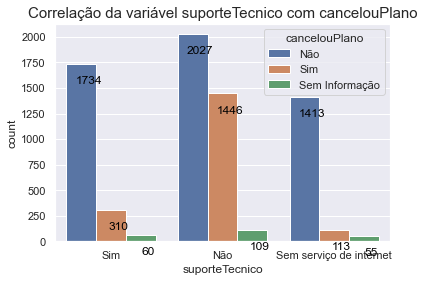

In [105]:
ax =  sns.countplot(x='suporteTecnico', hue='cancelouPlano', data=dataset)
ax.set_title('Correlação da variável suporteTecnico com cancelouPlano', fontsize=15)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=12)
plt.show()

Clientes que não tem suporte técnico tendem a cancelar mais o plano:
 - A busca por ajuda sem o suporte especializado pode ser muito dificil/demorada
 - O produto pode dar muito problema 

##### Correlação com formaPagamento

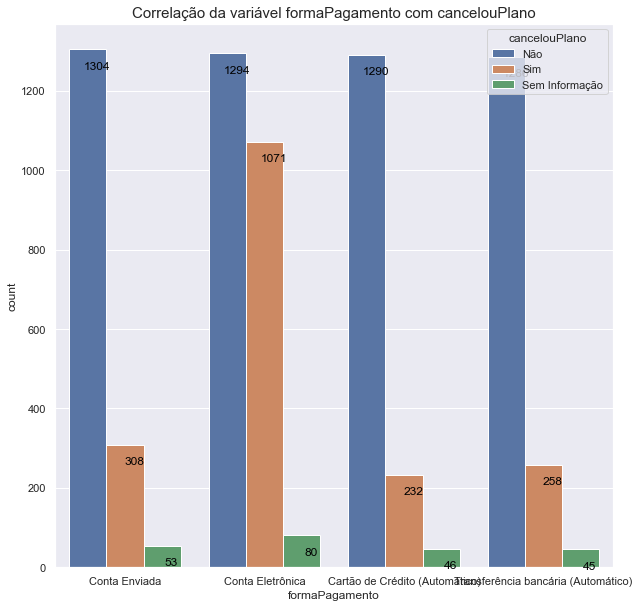

In [128]:
ax =  sns.countplot(x='formaPagamento', hue='cancelouPlano', data=dataset)
ax.set_title('Correlação da variável formaPagamento com cancelouPlano', fontsize=15)
plt.rcParams["figure.figsize"] = (8, 10)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=12)
plt.show()

Temos uma alta evasão de clientes com conta eletrônica 

##### Correlação com contaOnline

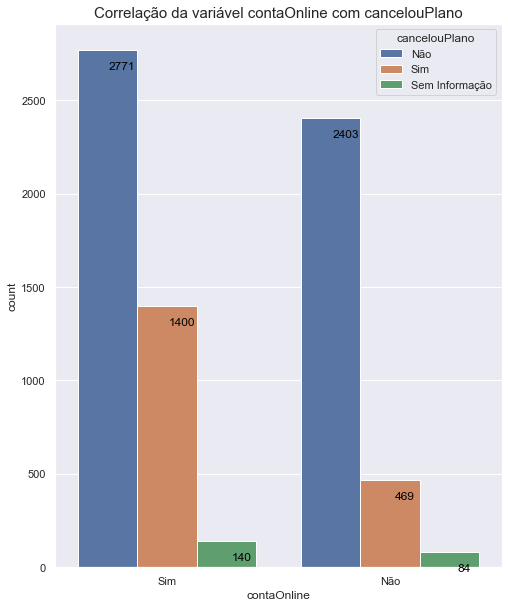

In [130]:
ax =  sns.countplot(x='contaOnline', hue='cancelouPlano', data=dataset)
ax.set_title('Correlação da variável contaOnline com cancelouPlano', fontsize=15)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=12)
plt.show()

Temos uma alta evasão de clientes com conta online junto com a conta eletrônica 

##### Correlação com segurancaOnline, backupOnline, streamingTV, streamingFilmes, assinaturaTelefonica, multiplasLinhas e protecaoDispositivo

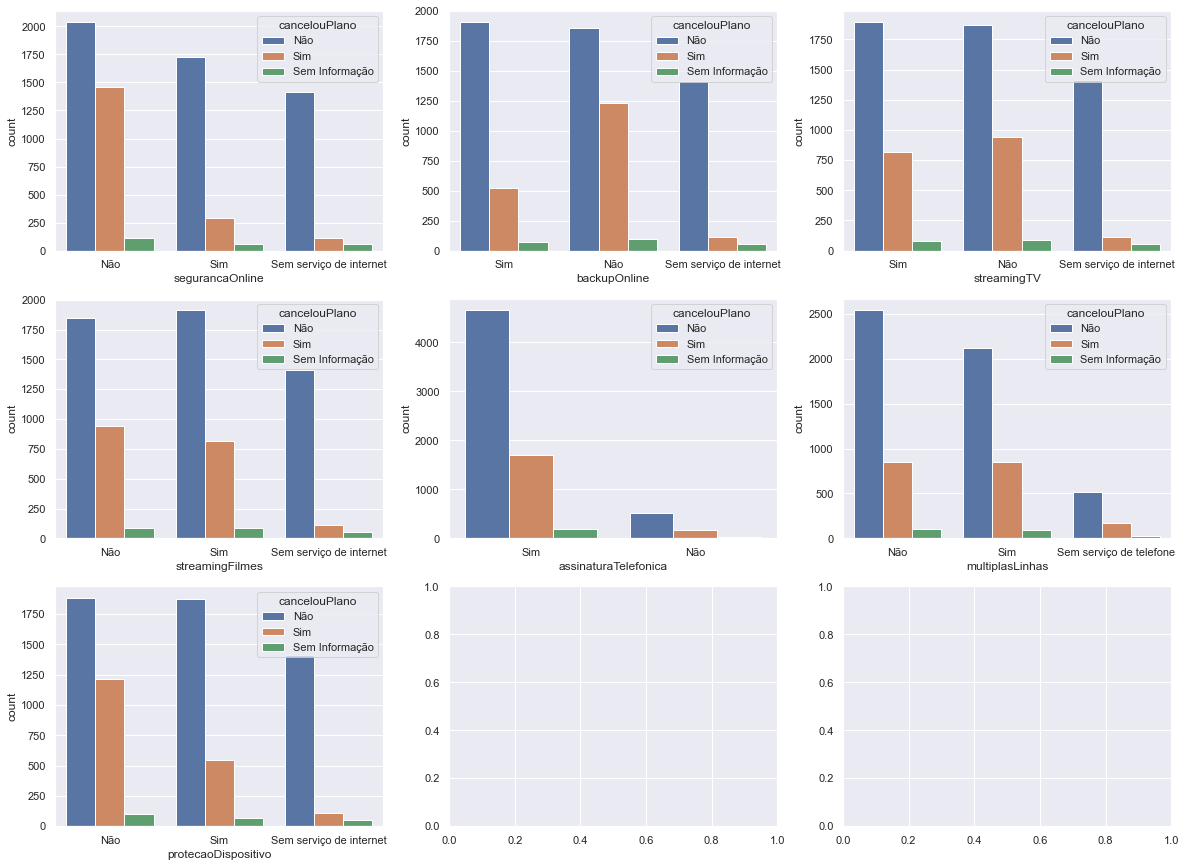

In [86]:
columns = [
    'segurancaOnline',
    'backupOnline',
    'streamingTV',
    'streamingFilmes',
    'assinaturaTelefonica',
    'multiplasLinhas',
    'protecaoDispositivo'       
]
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=[20,15])
axs = axs.flatten()
i=0
for col in columns:
    sns.countplot(x=dataset[col], hue='cancelouPlano', data=dataset, ax=axs[i])
    i = i + 1
  

A correlação entre o cancelamento:
- Pessoas que não tem segurança online tem cancelado mais 
- Pessoas sem backup online tem cancelado mais 
- Pessoas que não tem proteção tem cancelado mais 

Acredito que o serviço de internet/telefonia por si só possa não estar de acordo para os clientes, imaginar que podemos ter problema nesses serviço ou o valor está muito acima do estimado.

#### Checando com o Gráfico de Correlação